In [1]:
# install.packages(c("plotrix", "dplyr"))

In [2]:
library(dplyr)
library(plotrix)

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'plotrix' was built under R version 3.6.3"

In [3]:
setwd("D://LA//ATI Data")

In [4]:
AU <- read.table(file="AuthUserNames.txt", header=F)
PU <- read.table(file="ProcessUserNames.txt", header=F)

In [5]:
AU <- as.vector(AU$V1)
PU <- as.vector(PU$V1)

head(AU)
length(AU)
head(PU)
length(PU)

[1] "User024511" "User063197" "User203147" "User365588" "User409683"
[6] "User538831"

[1] 99

[1] "User179746"  "Comp599155$" "User317732"  "AppService"  "Comp931233$"
[6] "User553613"

[1] 71

In [6]:
AU <- unique(AU)
PU <- unique(PU)

length(AU)
length(PU)

[1] 95

[1] 66

In [7]:
OnlyAuth <- AU[AU%in%PU==FALSE]
paste("There are", length(OnlyAuth), "usernames present in Auth that do not feature in Proc")
cat("\nSuch as:\n")
print(head(OnlyAuth))

OnlyProc <- PU[PU%in%AU==FALSE]
paste("There are", length(OnlyProc), "usernames present in Proc that do not feature in Auth")
cat("\nSuch as:\n")
print(head(OnlyProc))

[1] "There are 87 usernames present in Auth that do not feature in Proc"


Such as:
[1] "User024511" "User063197" "User365588" "User409683" "User538831"
[6] "User768610"


[1] "There are 58 usernames present in Proc that do not feature in Auth"


Such as:
[1] "Comp599155$" "Comp931233$" "User553613"  "Comp513140$" "Comp591296$"
[6] "Comp123959$"


In [8]:
Common <- AU[AU%in%PU==TRUE]
identical(Common[order(Common)], PU[PU%in%AU==TRUE][order(PU[PU%in%AU==TRUE])], attrib.as.set = TRUE)

print(Common)

[1] TRUE

[1] "User203147"  "User794682"  "User317732"  "User179746"  "User110290" 
[6] "AppService"  "Comp289117$" "Comp939275$"


In [9]:
Auth <- read.table(file="Summaries//Just_Auth//LA.txt", header=T, sep=",")

In [10]:
Proc <- read.table(file="Summaries//Just_Process//ProcessData.txt", header=T, sep=",")

In [11]:
Proc <- Proc[, -1]
Auth <- Auth[, -1]

In [12]:
head(Auth)
head(Proc)

UserName,SrcDevice,DstDevice,AuthType,Failure,DailyCount
User035855,Comp808475,Comp081330,TGS,0,17
Comp655251$,Comp655251,ActiveDirectory,NetworkLogon,0,350
User762066,Comp306129,ActiveDirectory,TGS,0,22
User384215,Comp095190,EnterpriseAppServer,NetworkLogon,0,35
User043263,Comp883307,Comp384394,TGS,0,2
User631552,Comp621781,Comp915658,NetworkLogon,0,1


UserName,Device,ProcessName,ParentProcessName,DailyCount
Comp748297$,Comp748297,Proc391839.exe,Proc387473,1
Comp563664$,Comp563664,rundll32.exe,services,1
User607396,Comp609111,Proc417435.exe,Proc417435,1
Comp641702$,Comp641702,Proc249569.exe,services,1
Comp157389$,Comp157389,Proc402696.exe,services,1
Comp664825$,Comp664825,Proc402696.exe,services,1


In [13]:
MalAuth <- Auth[Auth$UserName%in%AU, ]
MalProc <- Proc[Proc$UserName%in%PU, ]

dim(MalAuth)
dim(MalProc)

[1] 151819      6

[1] 230189      5

In [14]:
CommAuth <- Auth[Auth$UserName%in%Common, ]
CommProc <- Proc[Proc$UserName%in%Common, ]

dim(CommAuth)
dim(CommProc)

[1] 24269     6

[1] 35092     5

In [15]:
CommAuth %>% mutate(across(where(is.factor), as.character)) -> CommAuth
CommProc %>% mutate(across(where(is.factor), as.character)) -> CommProc
MalAuth %>% mutate(across(where(is.factor), as.character)) -> MalAuth
MalProc %>% mutate(across(where(is.factor), as.character)) -> MalProc

In [16]:
table(CommAuth$UserName)[order(table(CommAuth$UserName))]
cat("\n")
table(CommProc$UserName)[order(table(CommProc$UserName))]


 User179746  User794682 Comp289117$  User317732  User203147 Comp939275$ 
         57         165         488        1328        1414        2072 
 User110290  AppService 
       2954       15791 


 User179746  User794682  User317732  User110290 Comp289117$  User203147 
        188         582        1437        2423        3224        4672 
Comp939275$  AppService 
       4891       17675 

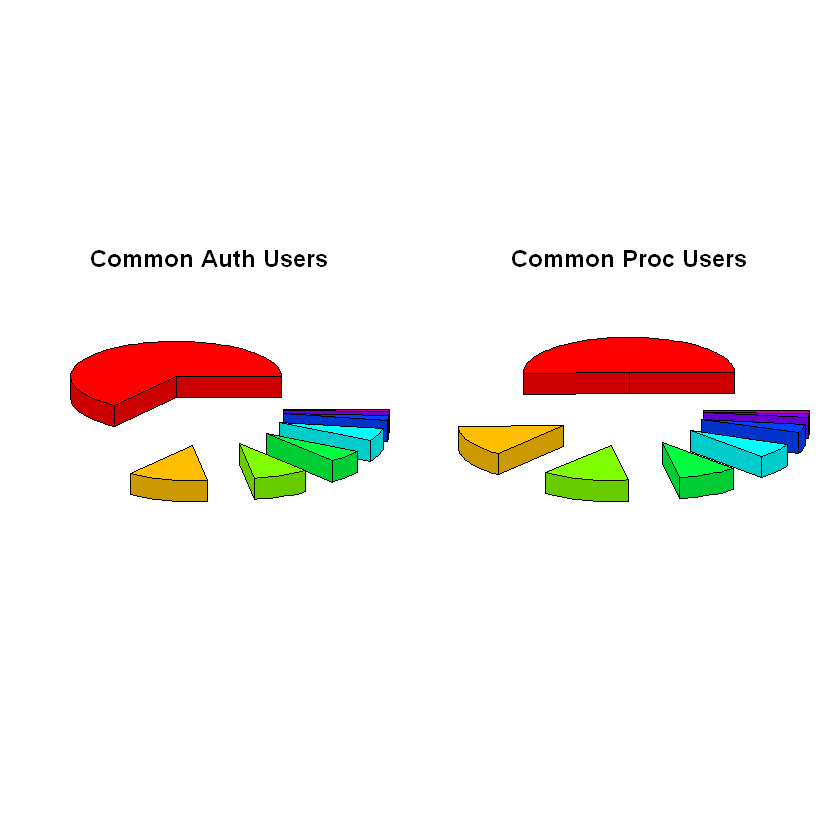

In [46]:
op <- par(mfrow=c(1,2))
pie3D(table(CommAuth$UserName)[order(table(CommAuth$UserName), decreasing=TRUE)], col=rainbow(8), main="Common Auth Users", explode=0.7)
pie3D(table(CommProc$UserName)[order(table(CommProc$UserName), decreasing=TRUE)], col=rainbow(8), main="Common Proc Users", explode=0.7)
par(op)

## User179746

In [17]:
U1<- CommAuth[CommAuth$UserName=='User179746', ]
U2<- CommProc[CommProc$UserName=='User179746', ]

head(U1)
head(U2)

,UserName,SrcDevice,DstDevice,AuthType,Failure,DailyCount
2309303,User179746,Comp599155,None,InteractiveLogon,0,2
6027757,User179746,Comp599155,None,InteractiveLogon,0,2
6889517,User179746,Comp599155,None,InteractiveLogon,0,2
9667214,User179746,Comp679250,Comp599155,NetworkLogon,0,8
9672243,User179746,Comp547871,ActiveDirectory,NetworkLogon,1,1
9727819,User179746,Comp679250,Comp599155,RemoteInteractive,0,8


,UserName,Device,ProcessName,ParentProcessName,DailyCount
3642629,User179746,Comp599155,Proc706548.exe,Proc444602,2
3709166,User179746,Comp599155,Proc604969.exe,Proc444602,1
3841198,User179746,Comp599155,Proc412499.exe,Proc444602,2
3852765,User179746,Comp599155,Proc407594.exe,Proc412499,2
7683119,User179746,Comp599155,Proc447231.exe,Proc442764,1
7742208,User179746,Comp599155,Proc690950.exe,Proc089893,1


In [18]:
U1F <- U1[U1$Failure==1, ]
head(U1F)   ## Note: Assign really large weight to Failure!

,UserName,SrcDevice,DstDevice,AuthType,Failure,DailyCount
9672243,User179746,Comp547871,ActiveDirectory,NetworkLogon,1,1
9779940,User179746,Comp679250,Comp599155,NetworkLogon,1,3
9866675,User179746,Comp599155,Comp936659,NetworkLogon,1,6
9884093,User179746,Comp599155,Comp422203,NetworkLogon,1,3
9884731,User179746,Comp599155,EnterpriseAppServer,NetworkLogon,1,12
9885162,User179746,Comp599155,Comp312245,NetworkLogon,1,6


In [19]:
table(U1$SrcDevice)
table(U2$Device)


Comp215429 Comp547871 Comp599155 Comp679250 
         1          3         45          8 


Comp547871 Comp599155 
        18        170 

In [27]:
U1Src <- as.vector(unique(U1$SrcDevice))
U2Src<- as.vector(unique(U2$Device))

CommDev <- U1Src[U1Src%in%U2Src]
U1_investig <- U1[U1$SrcDevice%in%CommDev, ]
U2_investig <- U2[U2$Device%in%CommDev, ]

In [28]:
head(U1_investig)
dim(U1_investig)
head(U2_investig)
dim(U2_investig)

,UserName,SrcDevice,DstDevice,AuthType,Failure,DailyCount
2309303,User179746,Comp599155,None,InteractiveLogon,0,2
6027757,User179746,Comp599155,None,InteractiveLogon,0,2
6889517,User179746,Comp599155,None,InteractiveLogon,0,2
9672243,User179746,Comp547871,ActiveDirectory,NetworkLogon,1,1
9866675,User179746,Comp599155,Comp936659,NetworkLogon,1,6
9884093,User179746,Comp599155,Comp422203,NetworkLogon,1,3


[1] 48  6

,UserName,Device,ProcessName,ParentProcessName,DailyCount
3642629,User179746,Comp599155,Proc706548.exe,Proc444602,2
3709166,User179746,Comp599155,Proc604969.exe,Proc444602,1
3841198,User179746,Comp599155,Proc412499.exe,Proc444602,2
3852765,User179746,Comp599155,Proc407594.exe,Proc412499,2
7683119,User179746,Comp599155,Proc447231.exe,Proc442764,1
7742208,User179746,Comp599155,Proc690950.exe,Proc089893,1


[1] 188   5

In [34]:
dim(Auth[Auth$AuthType=='InteractiveLogon' & Auth$DstDevice!='None', ]) ## So InteractiveLogon=='None' DstDevice
dim(Auth[Auth$AuthType!='InteractiveLogon' & Auth$DstDevice=='None', ])

dim(Auth[Auth$AuthType!='InteractiveLogon' & Auth$DstDevice=='None' & Auth$UserName%in%AU,])

[1] 0 6

[1] 1321285       6

[1] 18383     6

In [31]:
dim(Auth[Auth$AuthType=='InteractiveLogon' & Auth$Failure==1, ])
dim(Auth[Auth$AuthType=='InteractiveLogon' & Auth$Failure==1 & Auth$UserName%in%AU, ]) ## Some local logons are from the Mal list but most are not 

[1] 31382     6

[1] 1064    6